<a href="https://colab.research.google.com/github/NicoPatalagua/Scikit-learn/blob/master/Sci_Kit_Learn_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo A: Regresión Lineal - MultiVariable

$Sci-Kit Learn$ es un poderoso módulo de Python para el aprendizaje de máquina. 
Contiene funciones de regresión, clasificación, agrupación, selección de modelos y reducción de la dimensionalidad. 

El ejemplo se utilizará el módulo <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model</a> que contiene 
"métodos destinados a la regresión en los que se espera que el "Target Value" 
sea una combinación lineal de las variables de entrada".




## 1.- Se cargan las bibliotecas con sus módulos correspondientes

In [1]:
import numpy as np #Soporte para vectores y matrices
import pandas as pd #Manipulación y análisis de datos 
import seaborn as sns #Graficos elegantes 
import matplotlib.pyplot as plt #Diseño y realización de graficas
#incorporar las gráficas en este documento
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- <a href="https://matplotlib.org/2.1.2/Matplotlib.pdf">MatPlotLib</a>
- <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection"> module-sklearn.model_selection </a>
- <a href="https://scikit-learn.org/stable/datasets/index.html"> sklearn.datasets </a>
- <a href="https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics"> sklearn.metrics </a>

In [0]:
from sklearn.model_selection import train_test_split #Dividir dataset en trenes aleatorios y subconjuntos de prueba
from sklearn.linear_model import LinearRegression #Regresión lineal de mínimos cuadrados ordinarios.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Error cuadratico medio, error absoluto medio y r2 score.

## 2.- Exporación y preparación del conjunto de datos 

In [3]:
#Exportamos el dataset
ObjData=pd.read_csv('data.csv')
#Presentar la cabecera del dataset
ObjData.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#Presentar la cantidad de filas y columnas:
ObjData.shape

(50, 5)

In [5]:
#Limpiamos el dataset
ObjData.dropna()
ObjData.shape

(50, 5)

In [6]:
print("Columnas: ",ObjData.columns)
print("Número de filas: ",ObjData.shape[0])

Columnas:  Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
Número de filas:  50


In [7]:
#Contamos valores por estado
ObjData['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [8]:
#Exploramos un poco los datos
print("Información del dataset:\n")
ObjData.info()

Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
#Realizamos un resumen estadistico
print("Resumen estadístico:")
ObjData.describe().T

Resumen estadístico:


,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [10]:
#Usamos profit (lucro) como variable tarjet
ObjData.rename(columns={'Profit':'target'},inplace=True)
ObjData.head()

,R&D Spend,Administration,Marketing Spend,State,target
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## 3.- Visualización de los Datos (Selección de Variables Independientes $features$)
- Dispersión par por variables
- Gráfica de Distribución (Baja distribución "no ayuda a la predición de $Target$")
- Gráfica de Matriz de Correlación (relación con la variable $Target$)

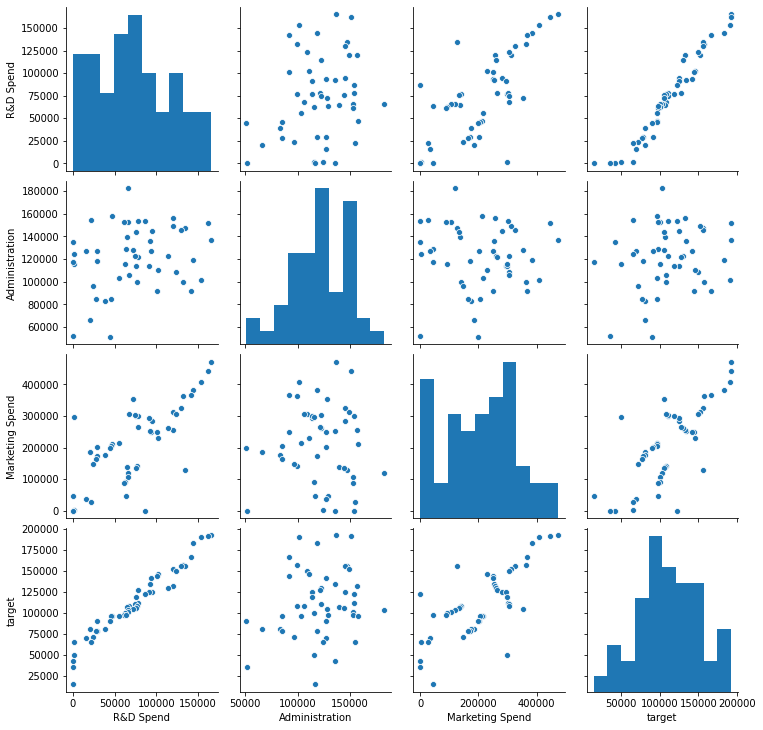

In [11]:
#Dispersion par por variables
sns.pairplot(ObjData)

Grafico de distribución


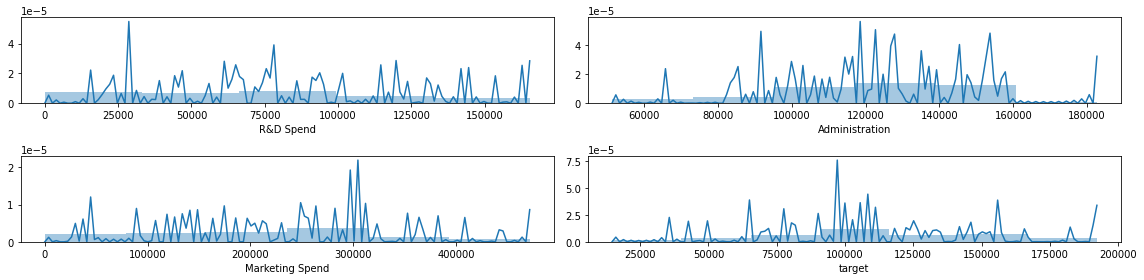

In [12]:
# Grafica de distribución 
print("Grafico de distribución")
ObjData1=ObjData.drop(['State'], axis='columns')
ObjFilas = 2
ObjColumnas = 2
fig, ax = plt.subplots(nrows=ObjFilas, ncols=ObjColumnas, figsize=(16,4))
columna = ObjData1.columns
index = 0
for i in range(ObjFilas):
    for j in range(ObjColumnas):
        sns.distplot(ObjData1[columna[index]], ax = ax[i][j], kde_kws={'bw':0.1})
        index = index + 1
plt.tight_layout()

In [13]:
#Matriz de Correlación
matrixCorrelacion =ObjData.corr()
matrixCorrelacion

,R&D Spend,Administration,Marketing Spend,target
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
target,0.972900,0.200717,0.747766,1.000000


### Mapa de Calor para representar la correlación

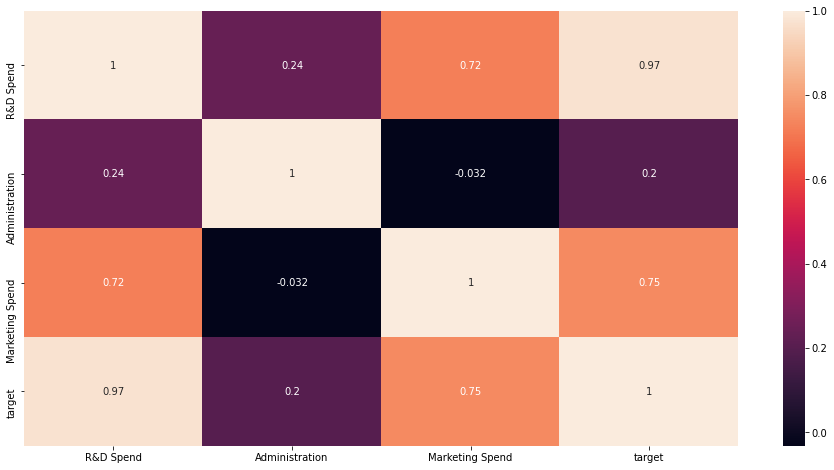

In [14]:
#Realizamos el mapa de calor
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(matrixCorrelacion, annot=True)

In [15]:
#Presentar el indice de la matriz de correlación
matrixCorrelacion.index

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'target'], dtype='object')

- Función para seleccionar $features$ con relación a la variable $target$. De esta forma se evita la MULTICOLLINEARITY

In [0]:
def relacionFeatures(correlacionData, umbral):
    feature = []
    valor = []
    for i, index in enumerate(correlacionData.index):
        if abs(correlacionData[index]) > umbral:
            feature.append(index)
            valor.append(correlacionData[index])    
    df  = pd.DataFrame(data = valor, index = feature, columns=['Valor Correlación'])
    return df

In [17]:
# umbral > 0.45
umbral = 0.45
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
valorCorrelacion

,Valor Correlación
R&D Spend,0.972900
Marketing Spend,0.747766
target,1.000000


In [18]:
#Representamos los datos de correlación correctos 
dataCorrAceptada = ObjData[valorCorrelacion.index]
dataCorrAceptada.head()

,R&D Spend,Marketing Spend,target
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


## 4.- A continuación se ajustará el modelo de regresión lineal y predecir.
Para estimar los coeficientes se usará el método de <a href="https://www.varsitytutors.com/hotmath/hotmath_help/spanish/topics/line-of-best-fit">Mínimos Cuadrados.</a>. 


### X = dataF.drop['target'] (o variables independientes)
### Y = dataF['target']

### Las funciones importantes a tener en cuenta al ajustar un modelo de regresión lineal son:

**lm.fit()**     -> Ajusta a un modelo lineal

**lm.predict()** -> Predecir **$Y$** usando el modelo lineal con coeficientes estimados

**lm.score()**   -> Devuelve el <a href="https://www.addlink.es/noticias/minitab/2736-como-interpretar-un-modelo-de-regresion-con-bajo-coeficiente-de-determinacion-r-cuadrado-y-bajos-valores-p">coeficiente de determinación (R$^2$)</a>. 
 
 - [Una medida de cuán bien se replican los resultados observados por el modelo, 
como la proporción de la variación total de los resultados explicada por el modelo.]
    

### Por hacer
- Selección de Variables Dep e Ind.
- División Valores en bloques de Entrenamiento y Prueba
- Ajuste a modelo lineal
- Selección del modelo lineal
- Entrenamiento del modelo
- Impresión coeficientes e intersepción.
- Diagrama de Dispersión.

In [0]:
#Seleccionamos las variables dependiente e independiente
X = dataCorrAceptada.drop('target', axis = 1)
y = dataCorrAceptada['target']

In [0]:
#Division de valores en bloques de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
#Seleccionamos el modelo lineal
modelo=LinearRegression()

## 5.-  Entrenamiento del Modelo

In [22]:
#Entrenamiento del modelo
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predict = modelo.predict(X_test)

In [24]:
# Impresión de intercepción, coeficientes y numero de coeficientes
print('Coeficiente: ',modelo.coef_)
print('Tamaño coeficiente: ',len(modelo.coef_))
print('Intercepción: ',modelo.intercept_)

Coeficiente:  [0.7886183  0.03257663]
Tamaño coeficiente:  2
Intercepción:  46346.338761236555


In [25]:
d = {'Predicted': y_predict, 'target': y_test}
df = pd.DataFrame(data=d)
decimals = 1
df['Predicted'] = df['Predicted'].apply(lambda x: round(x, decimals))
df.head(10)

,Predicted,target
28,102284.6,103282.38
11,133873.9,144259.40
10,134182.1,146121.95
41,73701.1,77798.83
2,180642.3,191050.39
27,114717.2,105008.31
38,68335.1,81229.06
31,97433.5,97483.56
22,114580.9,110352.25
4,170343.3,166187.94


## 6.- Métricas y Evaluación del Modelo

Se calcula 
   - mse  (<a href="https://support.numxl.com/hc/es/articles/115001223423-MSE-Error-Cuadrático-Medio">Error Cuadrático Medio </a>).             
   - mae  (<a href="https://support.numxl.com/hc/es/articles/215969423-MAE-Error-medio-absoluto">Error Medio Absoluto</a>). 
   - score (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"/> r2_score</a>).


- mae : Fácil de entender, dado que es el error promedio.
- mse : Es más popular que $mae$, dado que $mse$ castiga grandes errores, útil en el mundo real.
- score: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html">r2_score</a> Es incluso más popular que $mse$, dado que $rmse$ es interpretable en las unidades $"y"$
   - Esta no es una función simétrica. A diferencia de la mayoría de las otras puntuaciones, 
   la puntuación R^2 puede ser negativa (no tiene por qué ser el cuadrado de una cantidad R).
   - Esta métrica no está bien definida para muestras individuales y devolverá un valor de NaN 
     si n_muestras es menor que dos. 

In [26]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print('r2_score: ', score)
print('MAE: ', mae)
print('MSE: ', mse)

r2_score:  0.9474386447268488
MAE:  6886.594588246514
MSE:  67220275.3756812


In [0]:
#Función para almacenar las métricas de rendimiento
total_features = []
valor_correlacion = []
r2_valores = []
mse_valores = []
mae_valores = []

In [0]:
def metricas_evaluacion(features, umb, y_true, y_pred):
    puntuacion = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    total_features.append(len(features.columns)-1)
    valor_correlacion.append(umb)
    r2_valores.append(puntuacion)
    mse_valores.append(mse)
    mae_valores.append(mae)
    dfMetricas = pd.DataFrame(data=[total_features,valor_correlacion,r2_valores,mse_valores,mae_valores],
                             index=['#features','Umbral','R2','MSE','MAE'])
    return dfMetricas.T

In [29]:
#Evaluación del modelo según metricas
metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict)

,#features,Umbral,R2,MSE,MAE
0,2.0,0.45,0.947439,6.722028e+07,6886.594588


## 7.- Pruebas con diferentes umbrales de correlación. 
    Se busca la mejor combinación por umbral de coeficientes

In [0]:
#Entrenamiento automatico dado el "dataCorrAceptada" por su umbral
def obtener_y_predict(data_Correlacionado):
    X = dataCorrAceptada.drop('target', axis = 1)
    y = dataCorrAceptada['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_predict = modelo.predict(X_test)  
    return y_predict

In [31]:
#Probamos el score con un umbral de >0.5
umbral = 0.5
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

                 Valor Correlación
R&D Spend                 0.972900
Marketing Spend           0.747766
target                    1.000000 

    R&D Spend  Marketing Spend    target
45    1000.23          1903.93  64926.08
46    1315.46        297114.46  49490.75
47       0.00             0.00  42559.73
48     542.05             0.00  35673.41
49       0.00         45173.06  14681.40 

   #features  Umbral        R2           MSE          MAE
0        2.0    0.45  0.947439  6.722028e+07  6886.594588
1        2.0    0.50  0.947439  6.722028e+07  6886.594588 



In [32]:
#Probamos el score con un umbral de >0.6
umbral = 0.6
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

                 Valor Correlación
R&D Spend                 0.972900
Marketing Spend           0.747766
target                    1.000000 

    R&D Spend  Marketing Spend    target
45    1000.23          1903.93  64926.08
46    1315.46        297114.46  49490.75
47       0.00             0.00  42559.73
48     542.05             0.00  35673.41
49       0.00         45173.06  14681.40 

   #features  Umbral        R2           MSE          MAE
0        2.0    0.45  0.947439  6.722028e+07  6886.594588
1        2.0    0.50  0.947439  6.722028e+07  6886.594588
2        2.0    0.60  0.947439  6.722028e+07  6886.594588 



In [33]:
#Probamos el score con un umbral de >0.7
umbral = 0.7
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

                 Valor Correlación
R&D Spend                 0.972900
Marketing Spend           0.747766
target                    1.000000 

    R&D Spend  Marketing Spend    target
45    1000.23          1903.93  64926.08
46    1315.46        297114.46  49490.75
47       0.00             0.00  42559.73
48     542.05             0.00  35673.41
49       0.00         45173.06  14681.40 

   #features  Umbral        R2           MSE          MAE
0        2.0    0.45  0.947439  6.722028e+07  6886.594588
1        2.0    0.50  0.947439  6.722028e+07  6886.594588
2        2.0    0.60  0.947439  6.722028e+07  6886.594588
3        2.0    0.70  0.947439  6.722028e+07  6886.594588 



In [34]:
#Probamos el score con un umbral de >0.8
umbral = 0.8
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

           Valor Correlación
R&D Spend             0.9729
target                1.0000 

    R&D Spend    target
45    1000.23  64926.08
46    1315.46  49490.75
47       0.00  42559.73
48     542.05  35673.41
49       0.00  14681.40 

   #features  Umbral        R2           MSE          MAE
0        2.0    0.45  0.947439  6.722028e+07  6886.594588
1        2.0    0.50  0.947439  6.722028e+07  6886.594588
2        2.0    0.60  0.947439  6.722028e+07  6886.594588
3        2.0    0.70  0.947439  6.722028e+07  6886.594588
4        1.0    0.80  0.946459  6.847344e+07  6772.453280 



In [35]:
#Probamos el score con un umbral de >0.9
umbral = 0.9
valorCorrelacion = relacionFeatures(matrixCorrelacion['target'], umbral)
print(valorCorrelacion,"\n")
dataCorrAceptada = ObjData[valorCorrelacion.index]
print(dataCorrAceptada.tail(),"\n")
y_predict = obtener_y_predict(dataCorrAceptada)
print(metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict),"\n")

           Valor Correlación
R&D Spend             0.9729
target                1.0000 

    R&D Spend    target
45    1000.23  64926.08
46    1315.46  49490.75
47       0.00  42559.73
48     542.05  35673.41
49       0.00  14681.40 

   #features  Umbral        R2           MSE          MAE
0        2.0    0.45  0.947439  6.722028e+07  6886.594588
1        2.0    0.50  0.947439  6.722028e+07  6886.594588
2        2.0    0.60  0.947439  6.722028e+07  6886.594588
3        2.0    0.70  0.947439  6.722028e+07  6886.594588
4        1.0    0.80  0.946459  6.847344e+07  6772.453280
5        1.0    0.90  0.946459  6.847344e+07  6772.453280 

